In [12]:
import matplotlib.pyplot as plt
import pandas as pd
from qiskit import QuantumRegister, ClassicalRegister
from qiskit import QuantumCircuit
from qiskit import Aer, execute
from numpy import pi

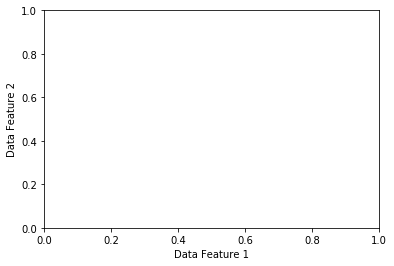

In [30]:
fig, ax = plt.subplots()
ax.set(xlabel='Data Feature 1', ylabel='Data Feature 2')

# Get the data from the .csv file
data = pd.read_csv('kmeans_data.csv',
    usecols=['Feature 1', 'Feature 2', 'Class'])

In [31]:
# Create binary variables to filter data
isGreen = data['Class'] == 'Green'
isBlue = data['Class'] == 'Blue'
isBlack = data['Class'] == 'Black'

# Filter data
greenData = data[isGreen].drop(['Class'], axis=1)
blueData = data[isBlue].drop(['Class'], axis=1)
blackData = data[isBlack].drop(['Class'], axis=1)

In [32]:
# This is the point we need to classify
y_p = 0.141
x_p = -0.161

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data.loc[:,["Feature 1","Feature 2"]] = scaler.fit_transform(data.loc[:,["Feature 1","Feature 2"]])

In [34]:
def normalize(v):
    norm = np.linalg.norm(v)
    if norm == 0: 
       return v
    return v / norm

In [35]:
for i in data.index:
    v = [data["Feature 1"][i],data["Feature 2"][i]]
    v = normalize(v)
    data.loc[i,"Feature 1"], data.loc[i,"Feature 2"] = v[0], v[1]

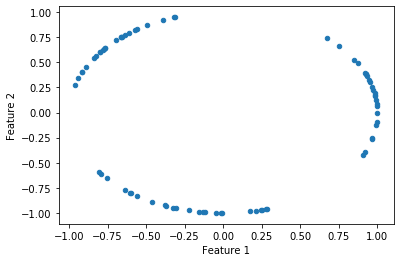

In [37]:
data.plot.scatter(x="Feature 1", y="Feature 2")